            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


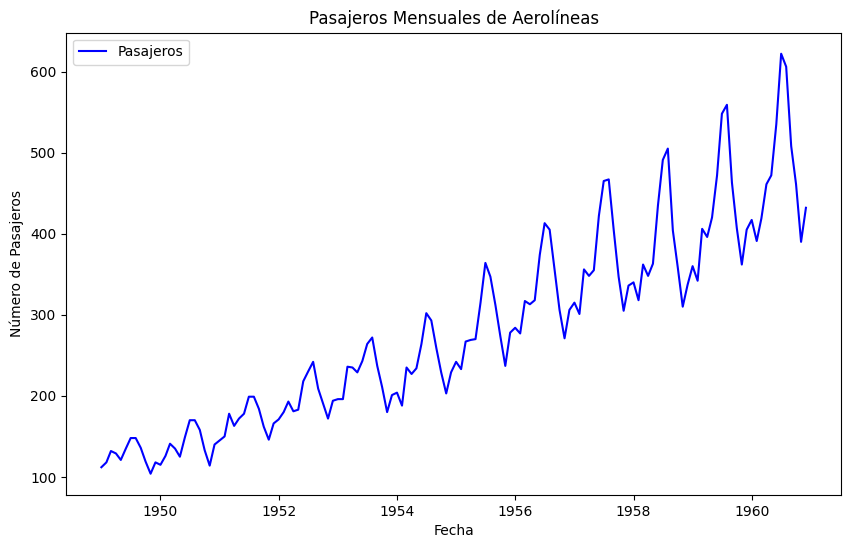

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos de pasajeros
data = pd.read_csv('data/airline-passengers.csv', parse_dates=['Month'], index_col='Month')

# Visualizar los primeros datos
print(data.head())

# Graficar la serie temporal de pasajeros
plt.figure(figsize=(10, 6))
plt.plot(data['Passengers'], label='Pasajeros', color='blue')
plt.title('Pasajeros Mensuales de Aerolíneas')
plt.xlabel('Fecha')
plt.ylabel('Número de Pasajeros')
plt.legend()
plt.show()

# Normalizar los datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data['Passengers_scaled'] = scaler.fit_transform(data[['Passengers']])

# Crear una función para generar secuencias de entrenamiento
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Definir longitud de secuencia (por ejemplo, 12 meses)
sequence_length = 12
X, y = create_sequences(data['Passengers_scaled'].values, sequence_length)

# Guardar las secuencias preprocesadas
np.save('data/X_sequences.npy', X)
np.save('data/y_sequences.npy', y)

